<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch7_WebAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Youtube

### Total Views

In [ ]:
TotalViews = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 7/youtube/Totalviews.csv')

In [ ]:
TotalViews.head()

,Date,Views
0,2013-09-22,44
1,2013-09-23,2
2,2013-09-24,27
3,2013-09-25,48
4,2013-09-26,103


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

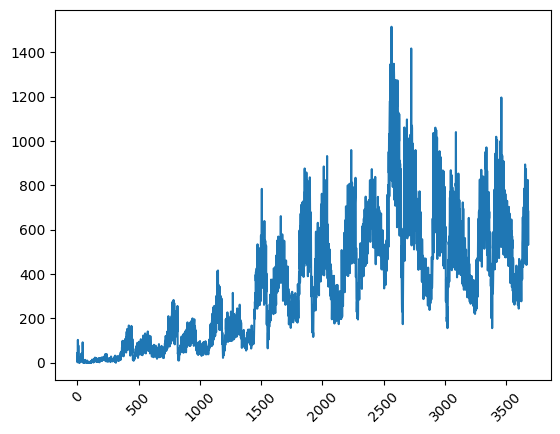

In [ ]:
plt.plot(TotalViews["Views"])
plt.xticks(rotation = 45)
plt.show()

Build a forecasting model to predict future views. Seasonality? Prophet model for different views on weekdays v weekends.

### Age

In [ ]:
age = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 7/youtube/age.csv')

In [ ]:
age.head()

,Viewer age,Views (%),Average view duration,Average percentage viewed (%),Watch time (hours) (%)
0,13–17 years,0.04,0:03:08,40.92,0.05
1,18–24 years,49.01,0:02:26,25.27,43.04
2,25–34 years,34.09,0:02:55,30.96,35.84
3,35–44 years,13.75,0:03:33,36.51,17.55
4,45–54 years,2.99,0:03:09,33.15,3.38


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

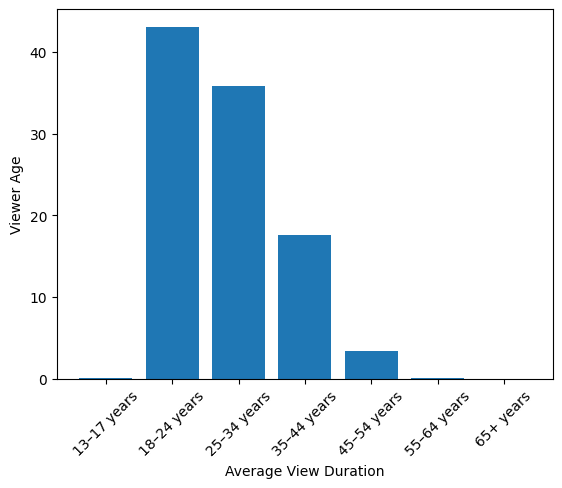

In [ ]:
plt.bar(age["Viewer age"] ,age['Watch time (hours) (%)'])
plt.ylabel('Viewer Age')
plt.xlabel('Average View Duration')
plt.xticks(rotation = 45)
plt.show()

### Content

In [ ]:
content = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 7/youtube/content.csv')

In [ ]:
content.head()

,Content,Video title,Video publish time,Views,Watch time (hours),Subscribers,Estimated revenue (USD),Average view duration,Impressions,Impressions click-through rate (%)
0,Total,NaN,NaN,1296398.0,61731.1045,4587.0,3899.310,0:02:51,8202554.0,6.46
1,KxBtMmzDRTk,Graphing Supply and Demand in Excel,"Jan 28, 2016",211830.0,8606.9686,282.0,1093.410,0:02:26,645165.0,8.37
2,R6H4Jy3fSDc,Calculating Marginal Revenue in Excel,"Nov 24, 2013",169731.0,5409.9523,117.0,233.009,0:01:54,249912.0,10.44
3,HZBfrgg1VXc,Capacity and Bottlenecks,"Jan 31, 2017",96891.0,3452.4370,573.0,433.318,0:02:08,795590.0,8.53
4,CBDfMETpaH4,Capacity Planning Process,"Jan 31, 2017",79221.0,3917.1554,388.0,453.487,0:02:58,705841.0,6.39


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
rev = content["Estimated revenue (USD)"].drop(index=0).dropna()

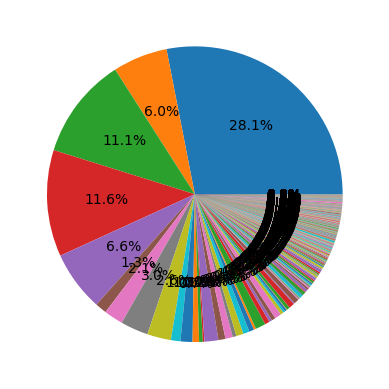

In [ ]:
plt.pie(rev.sort_index(),  autopct="%1.1f%%")
plt.show()

### Device

In [ ]:
device = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 7/youtube/device.csv')

In [ ]:
device.head()

,Device type,Views,Watch time (hours),Average view duration
0,Total,1296398,61731.1045,0:02:51
1,Computer,844283,43480.2808,0:03:05
2,Mobile phone,402939,15228.7177,0:02:16
3,Tablet,31520,1700.2835,0:03:14
4,TV,9723,826.8680,0:05:06


### Gender

In [ ]:
gender = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 7/youtube/gender.csv')

In [ ]:
gender.head()

,Viewer gender,Views (%),Average view duration,Average percentage viewed (%),Watch time (hours) (%)
0,Female,42.59,0:02:57,30.76,45.34
1,Male,57.40,0:02:39,28.68,54.66
2,User-specified,0.00,0:00:25,2.57,0.00


### Geography

In [111]:
geog = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 7/youtube/geography.csv')

In [112]:
geog.head()

,Geography,Views,Watch time (hours),Average view duration
0,Total,1296398,61731.1045,0:02:51
1,US,327135,14272.6996,0:02:37
2,CA,159164,14084.2513,0:05:18
3,IN,151259,4751.7523,0:01:53
4,PH,86627,3936.1559,0:02:43


In [102]:
!pip install iso3166

In [104]:
from iso3166 import countries

In [110]:
country_names =[]
geog_filtered = geog[geog['Geography'] != 'Total'].astype(str)
geog_filtered = geog_filtered[geog_filtered['Geography'] != 'nan']

for country in geog_filtered['Geography']:
    c_name = countries.get(country)
    country_names.append(c_name[2])

geog_filtered['iso_alpha'] = country_names

In [115]:
geog_filtered.head()

,Geography,Views,Watch time (hours),Average view duration,iso_alpha
1,US,327135,14272.6996,0:02:37,USA
2,CA,159164,14084.2513,0:05:18,CAN
3,IN,151259,4751.7523,0:01:53,IND
4,PH,86627,3936.1559,0:02:43,PHL
5,GB,32053,1446.7714,0:02:42,GBR


In [113]:
import plotly.express as px

In [116]:
fig = px.choropleth(geog_filtered, locations="iso_alpha",
                    color="Views",
                    hover_name="Geography",
                    locationmode='ISO-3')
fig.show()

### OS

In [ ]:
os = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 7/youtube/os.csv')

In [ ]:
os.head()

,Operating system,Views,Watch time (hours),Average view duration
0,Total,1296398,61731.1045,0:02:51
1,Windows,639149,33377.0521,0:03:07
2,Android,300781,10983.5381,0:02:11
3,Macintosh,193938,9426.2529,0:02:54
4,iOS,134117,6031.6863,0:02:41


### Source

In [ ]:
source = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 7/youtube/source.csv')

In [ ]:
source.head()

,Traffic source,Views,Watch time (hours),Average view duration,Impressions,Impressions click-through rate (%)
0,Total,1296398,61731.1045,0:02:51,8202554.0,6.46
1,YouTube search,482287,19887.2020,0:02:28,3926544.0,9.37
2,External,452033,25023.9045,0:03:19,NaN,NaN
3,Suggested videos,209598,9318.8988,0:02:40,2363255.0,5.24
4,Direct or unknown,54271,2542.3250,0:02:48,NaN,NaN


## Twitter

In [121]:
import pandas as pd
import json

Likes and DMs can be analyzed through text mining.

In [126]:
with open('/content/drive/MyDrive/BI BA Handbook/Chapter 7/twitter/like.js','r') as f:
    data = json.load(f)
df = pd.json_normalize(data['books'],
                     meta=[['like', 'tweetId'], ['like', 'fullText'],['like', 'expandedUrl']])

In [127]:
df.head()

,like.tweetId,like.fullText,like.expandedUrl
0,1681809703167463425,#ad Journeyed through @TESO Necrom yesterday w...,https://twitter.com/i/web/status/1681809703167...
1,1672217878404415488,I am really going to miss my lil fluffybutt. R...,https://twitter.com/i/web/status/1672217878404...
2,1670640422421680206,After 4 years of streaming..\nI thought I coul...,https://twitter.com/i/web/status/1670640422421...
3,1666271890833567749,#ad Had such a fun and Amazing first day in @T...,https://twitter.com/i/web/status/1666271890833...
4,1647061544797339648,"I'm home!!! No stream tonight, but get ready f...",https://twitter.com/i/web/status/1647061544797...


PRACTICE Importing Twitter files

Apps on Device (app.js)

Followers of the User (follower.js)

Combine multiple users (followers and following to build a network (graph) model)

In [143]:
with open('/content/drive/MyDrive/BI BA Handbook/Chapter 7/twitter/follower.js','r') as f:
    data = json.load(f)

df = pd.json_normalize(data['books'],
                     meta=[['follower', 'accountId'], ['follower', 'userLink']])

In [144]:
df.head()

,follower.accountId,follower.userLink
0,1649215389643988993,https://twitter.com/intent/user?user_id=164921...
1,1662063862391140352,https://twitter.com/intent/user?user_id=166206...
2,1705911366475722752,https://twitter.com/intent/user?user_id=170591...
3,34837672,https://twitter.com/intent/user?user_id=34837672
4,1555547600094482434,https://twitter.com/intent/user?user_id=155554...


PRACTICE

Who the User is Following (following.js)